# Customer Segmentation using Clustering Algorithms

This notebook performs EDA, preprocessing, clustering (KMeans, Agglomerative, DBSCAN), visualizations, and interpretation for a small customer dataset.

## 1. Load dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Artificial Inteligent ( AI )  Lab/mall_customer_segmentation (1).csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,49,22,12
1,2,Female,56,41,25
2,3,Male,66,41,52
3,4,Male,69,35,85
4,5,Male,49,44,100
5,6,Female,21,111,53
6,7,Male,47,42,23
7,8,Male,54,125,16
8,9,Male,40,75,57
9,10,Female,56,62,39


from matplotlib import pyplot as plt
df['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='CustomerID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Annual Income (k$)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Annual Income (k$)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Spending Score (1-100)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Spending Score (1-100)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CustomerID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CustomerID'}, axis=1)
              .sort_values('CustomerID', ascending=True))
  xs = counted['CustomerID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='CustomerID', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Annual Income (k$)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Spending Score (1-100)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

·Perform basic exploratory data analysis (EDA) with visualizations.

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  22                      12
1           2  Female   56                  41                      25
2           3    Male   66                  41                      52
3           4    Male   69                  35                      85
4           5    Male   49                  44                     100

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              10 non-null     int64 
 1   Gender                  10 non-null     object
 2   Age                     10 non-null     int64 
 3   Annual Income (k$)      10 non-null     int64 
 4   Spending Score (1-100)  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes
None

Summ

/tmp/ipython-input-2812038443.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="pastel")


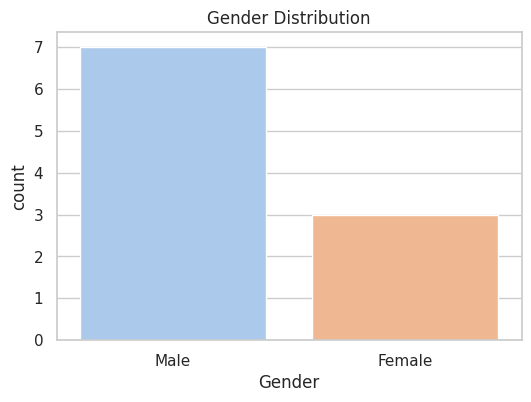

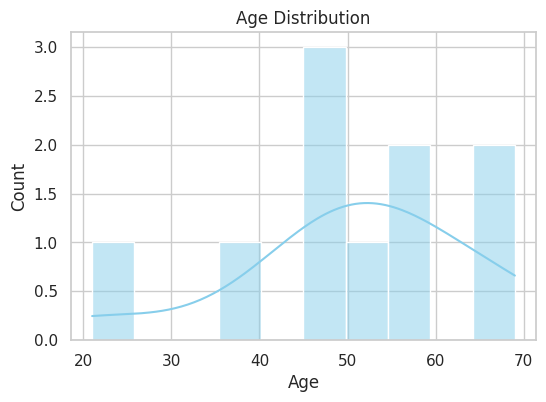

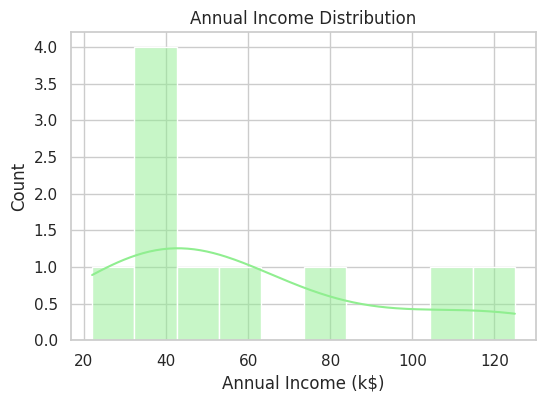

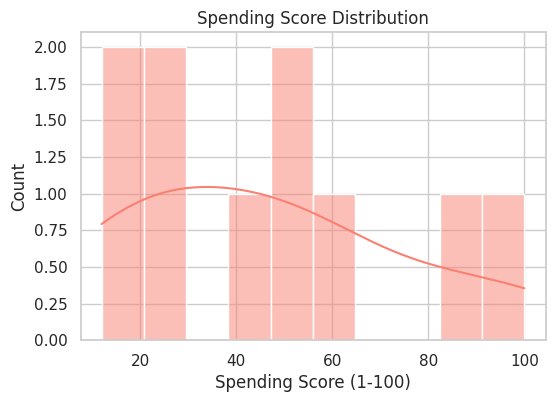

/tmp/ipython-input-2812038443.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Age", data=df, palette="pastel")


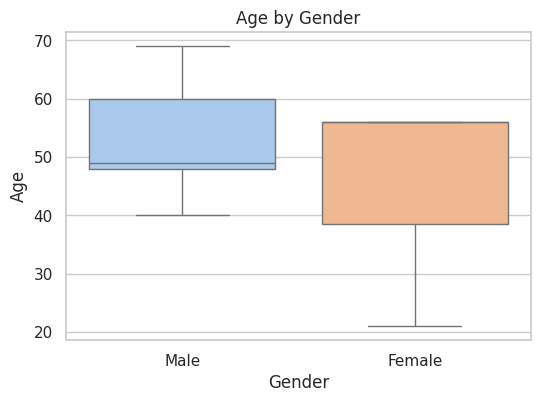

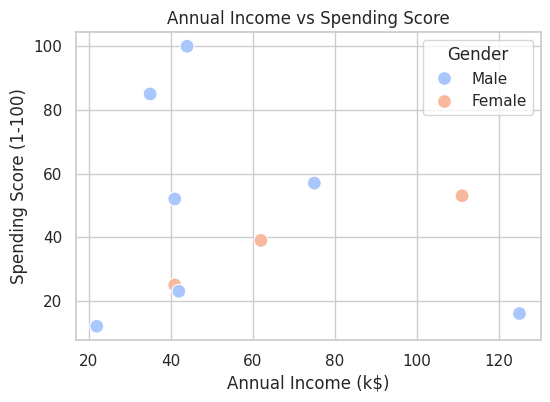

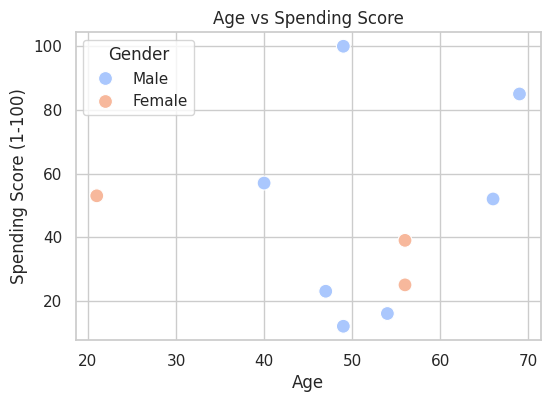

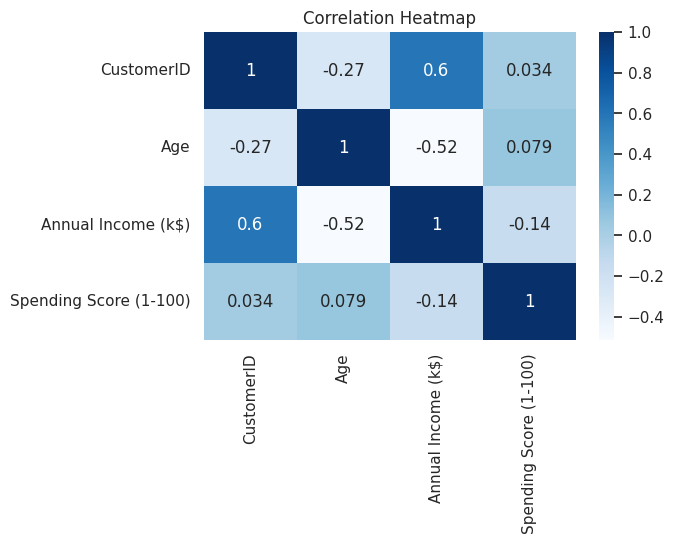

In [4]:
# =============================
# Customer Segmentation - EDA
# =============================

# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 2. Load dataset
df = pd.read_csv("/content/drive/MyDrive/Artificial Inteligent ( AI )  Lab/mall_customer_segmentation (1).csv")  # <-- change to your dataset path
print("First 5 rows of the dataset:")
print(df.head())

# 3. Basic dataset info
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# 4. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 5. Univariate Analysis (single variable)
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df, palette="pastel")
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], kde=True, bins=10, color="skyblue")
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["Annual Income (k$)"], kde=True, bins=10, color="lightgreen")
plt.title("Annual Income Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["Spending Score (1-100)"], kde=True, bins=10, color="salmon")
plt.title("Spending Score Distribution")
plt.show()

# 6. Bivariate Analysis (two variables)
plt.figure(figsize=(6, 4))
sns.boxplot(x="Gender", y="Age", data=df, palette="pastel")
plt.title("Age by Gender")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df, palette="coolwarm", s=100)
plt.title("Annual Income vs Spending Score")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x="Age", y="Spending Score (1-100)", hue="Gender", data=df, palette="coolwarm", s=100)
plt.title("Age vs Spending Score")
plt.show()

# 7. Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

## 2. Summary statistics and missing values

In [5]:
df.describe(include='all')

# Missing values
print('Missing values:\n', df.isnull().sum())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## 3. Preprocessing
- Encode Gender
- Standardize numeric features

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])
features = df[['Gender_encoded','Age','Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
X_scaled[:5]

array([[ 0.65465367, -0.13226068, -1.17068828, -1.23107631],
       [-1.52752523,  0.41234212, -0.58224708, -0.76312333],
       [ 0.65465367,  1.19034613, -0.58224708,  0.20877902],
       [ 0.65465367,  1.42374733, -0.76807062,  1.39665967],
       [ 0.65465367, -0.13226068, -0.48933531,  1.93660542]])

## 4. KMeans clustering and selection of k
We test k from 2 to 5 and use silhouette score to choose the best k.

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
sil_scores = []
K_range = range(2,6)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

print('Inertia:', inertia)
print('Silhouette scores:', sil_scores)

Inertia: [27.644268314575548, 19.0103168393865, 11.42234724591354, 6.4204590060615825]
Silhouette scores: [np.float64(0.21063280327324624), np.float64(0.25011609951562314), np.float64(0.32260271605796126), np.float64(0.32938842493415327)]


## 5. Fit KMeans with chosen k and visualize clusters (Income vs Spending and PCA 2D)

In [8]:
best_k = K_range[int(__import__('numpy').argmax(sil_scores))]
print('Best k by silhouette:', best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['KMeans_cluster'] = kmeans.fit_predict(X_scaled)

df

Best k by silhouette: 5


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded,KMeans_cluster
0,1,Male,49,22,12,1,2
1,2,Female,56,41,25,0,3
2,3,Male,66,41,52,1,0
3,4,Male,69,35,85,1,0
4,5,Male,49,44,100,1,0
5,6,Female,21,111,53,0,1
6,7,Male,47,42,23,1,2
7,8,Male,54,125,16,1,4
8,9,Male,40,75,57,1,2
9,10,Female,56,62,39,0,3


### Plots
(Plots are saved as PNG files in the outputs folder; you can open them.)

6. Elbow Method & Silhouette Score

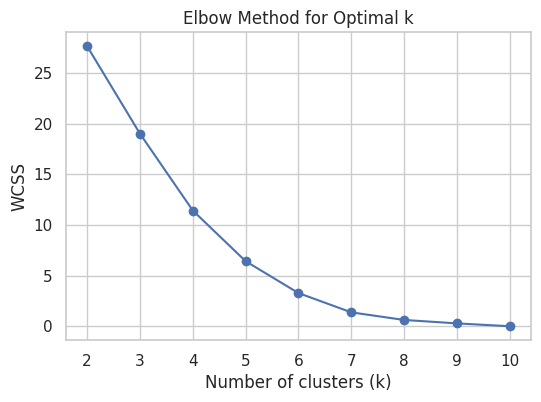

Silhouette Score for k=2: 0.211
Silhouette Score for k=3: 0.250
Silhouette Score for k=4: 0.323
Silhouette Score for k=5: 0.329
Silhouette Score for k=6: 0.354
Silhouette Score for k=7: 0.320
Silhouette Score for k=8: 0.250
Silhouette Score for k=9: 0.119


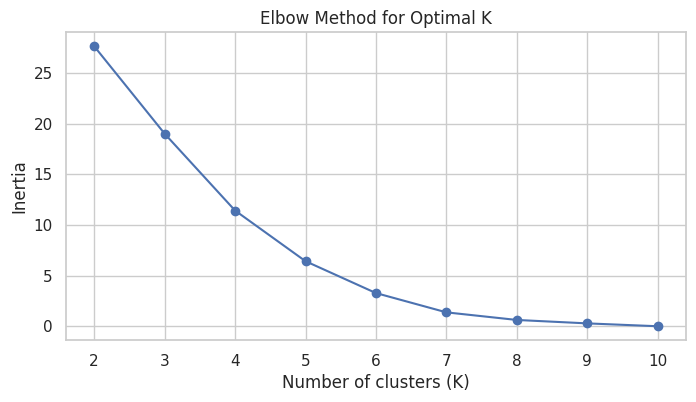

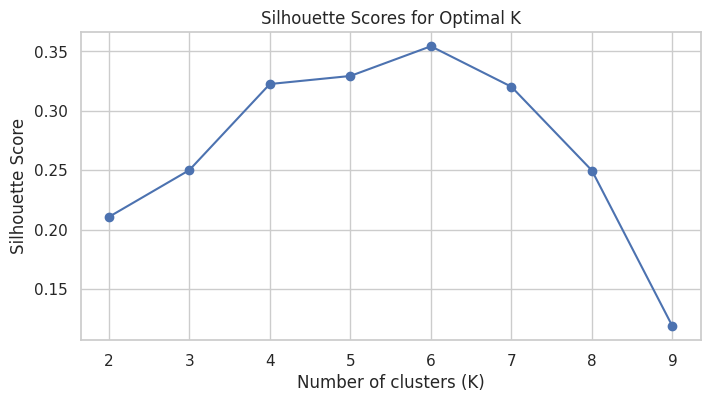

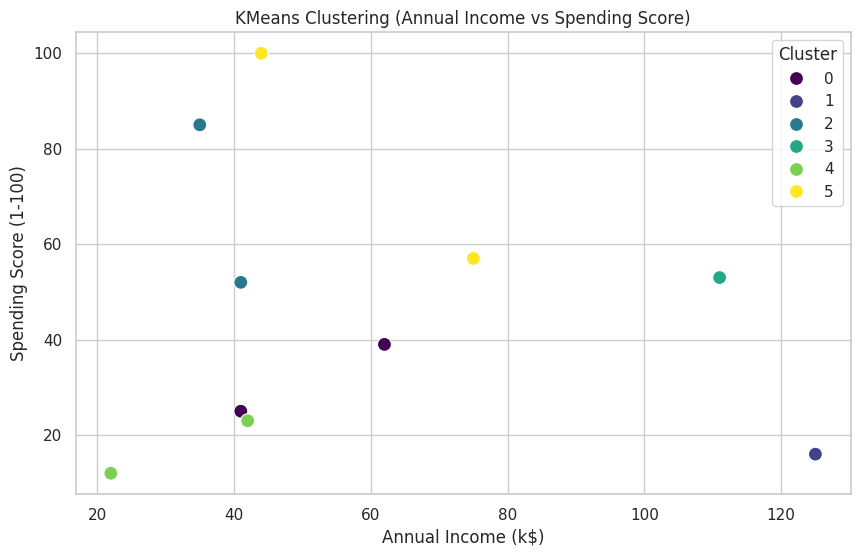

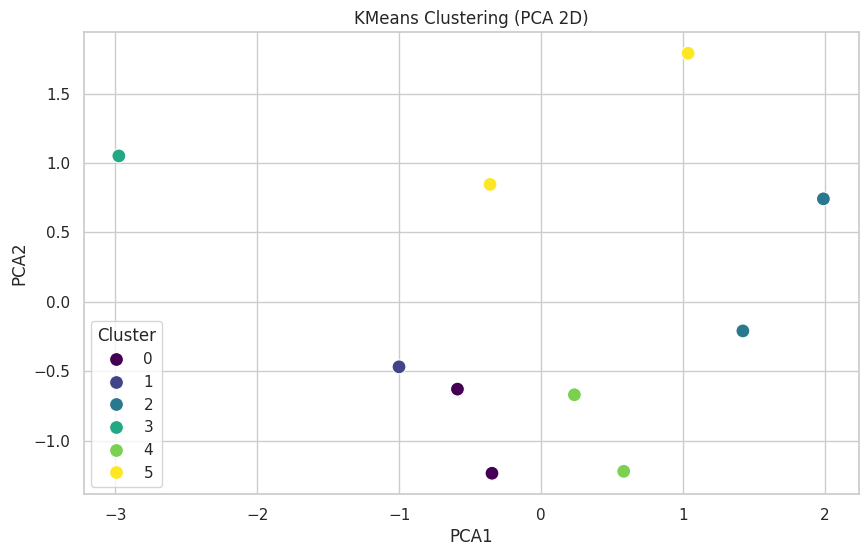

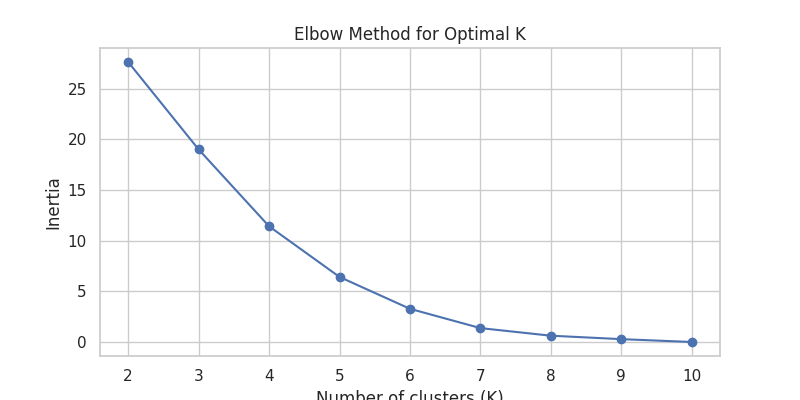

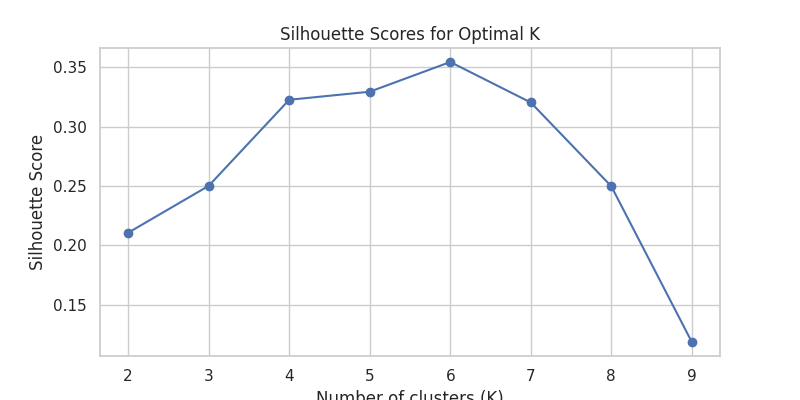

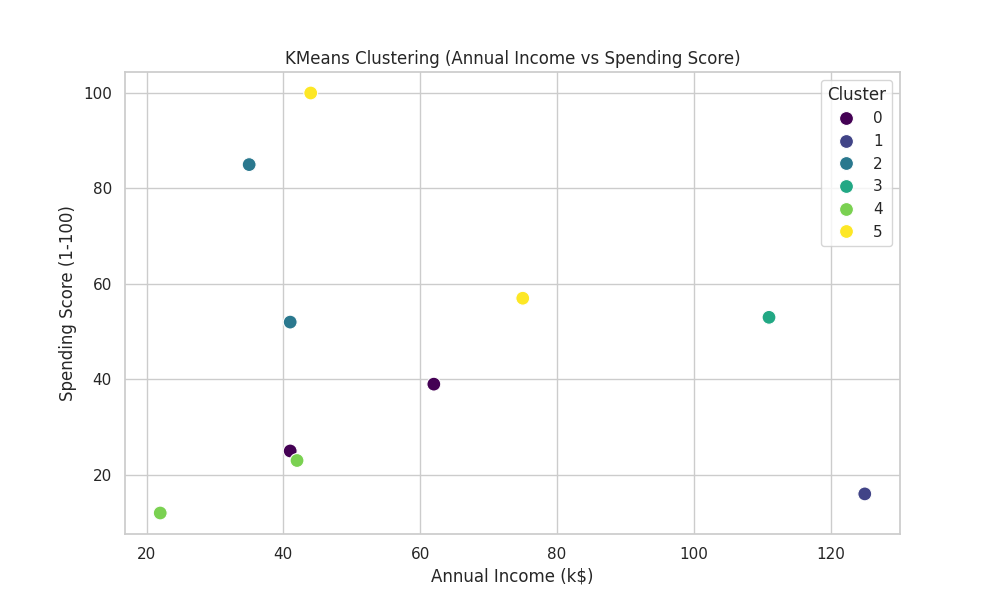

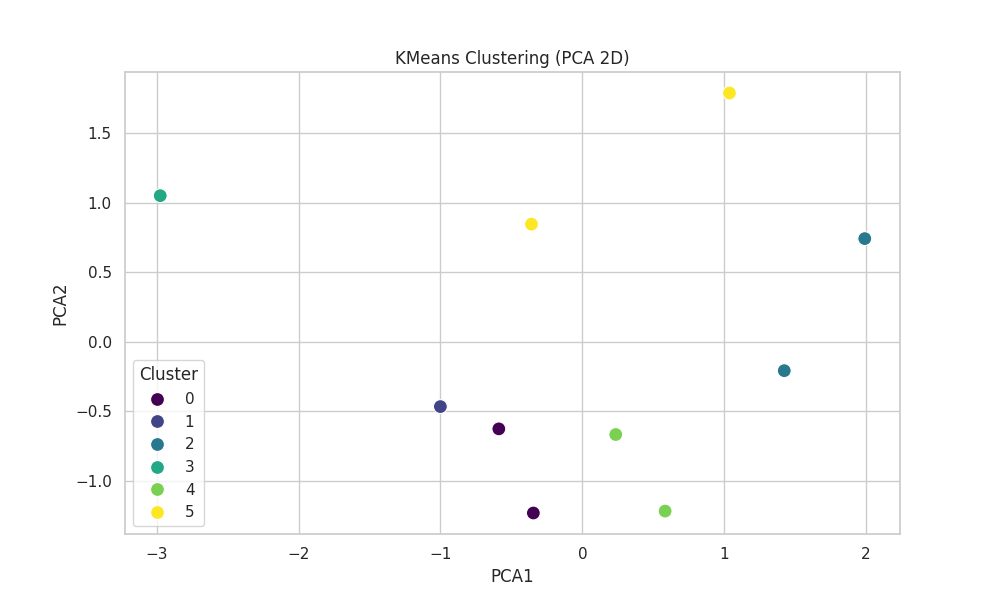

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
from IPython.display import Image, display
from sklearn.decomposition import PCA
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Artificial Inteligent ( AI )  Lab/mall_customer_segmentation (1).csv")

# Encode Gender column
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Male=1, Female=0

# Features for clustering
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
wcss = []
K_range = range(2, len(X) + 1)  # Set K_range up to the number of samples for WCSS
for i in K_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

# Silhouette Score for each k
sil_scores = []
K_range_sil = range(2, len(X)) # Limit K_range to n_samples - 1 for silhouette_score
for k in K_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.3f}")

# Create the output directory if it doesn't exist
output_dir = 'customer_segmentation_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Plot Inertia (Elbow Method)
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'elbow.png'))
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range_sil, sil_scores, marker='o')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range_sil)
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'silhouette.png'))
plt.show()

# Assuming best_k is determined from the silhouette scores
best_k = K_range_sil[np.argmax(sil_scores)]

# Fit KMeans with chosen k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
data['KMeans_cluster'] = kmeans.fit_predict(X_scaled)

# Plot Income vs Spending with KMeans clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_cluster', data=data, palette='viridis', s=100)
plt.title('KMeans Clustering (Annual Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.savefig(os.path.join(output_dir, 'income_spending_clusters.png'))
plt.show()

# Plot PCA 2D with KMeans clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['KMeans_cluster'] = data['KMeans_cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_cluster', data=df_pca, palette='viridis', s=100)
plt.title('KMeans Clustering (PCA 2D)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.savefig(os.path.join(output_dir, 'pca_kmeans.png'))
plt.show()

# Display saved plots
for fname in ['elbow.png','silhouette.png','income_spending_clusters.png','pca_kmeans.png']:
    display(Image(filename=f'customer_segmentation_outputs/{fname}'))

6. Visualize Clusters using Scatter Plot


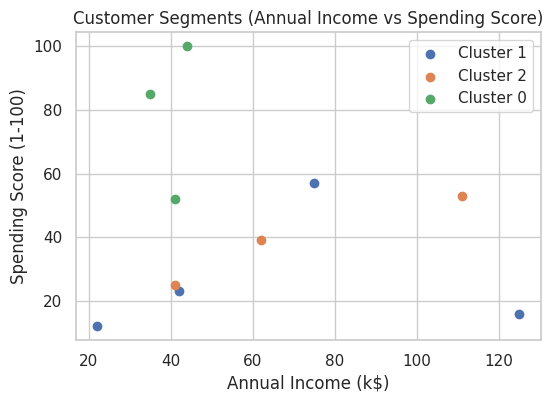

In [14]:
# Apply KMeans with chosen k (example k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters based on Annual Income vs Spending Score
plt.figure(figsize=(6,4))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

plt.title("Customer Segments (Annual Income vs Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

## 6. Agglomerative and DBSCAN for comparison

In [15]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
agg = AgglomerativeClustering(n_clusters=best_k)
df['Agglomerative_cluster'] = agg.fit_predict(X_scaled)
db = DBSCAN(eps=0.9, min_samples=2)
df['DBSCAN_cluster'] = db.fit_predict(X_scaled)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded,KMeans_cluster,Agglomerative_cluster,DBSCAN_cluster
0,1,Male,49,22,12,1,2,5,0
1,2,Female,56,41,25,0,3,1,1
2,3,Male,66,41,52,1,0,2,-1
3,4,Male,69,35,85,1,0,2,-1
4,5,Male,49,44,100,1,0,0,-1
5,6,Female,21,111,53,0,1,3,-1
6,7,Male,47,42,23,1,2,5,0
7,8,Male,54,125,16,1,4,4,-1
8,9,Male,40,75,57,1,2,0,-1
9,10,Female,56,62,39,0,3,1,1


## 7. Interpretation and business strategies
- Short description of clusters and suggested strategies.

(See the separate PDF report for a nicely formatted summary and visuals.)

Cluster Interpretation & Business Strategy Suggestions

In [16]:
import pandas as pd

# Assuming 'data' already contains the cluster labels from KMeans
# and includes columns: Gender, Age, Annual Income (k$), Spending Score (1-100)

# Cluster description
cluster_summary = data.groupby('Cluster').agg({
    'Gender': lambda x: 'More Males' if x.mean() > 0.5 else 'More Females',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'  # or another unique identifier
}).rename(columns={'CustomerID': 'Count'})

print("\n--- Cluster Summary ---")
print(cluster_summary)

# Generate insights
print("\n--- Interpretation & Insights ---")
for cluster, row in cluster_summary.iterrows():
    gender = row['Gender']
    age = row['Age']
    income = row['Annual Income (k$)']
    spend = row['Spending Score (1-100)']

    print(f"\nCluster {cluster}:")
    print(f"- Size: {row['Count']} customers")
    print(f"- Dominant Gender: {gender}")
    print(f"- Average Age: {age:.1f} years")
    print(f"- Average Annual Income: ${income:.1f}k")
    print(f"- Average Spending Score: {spend:.1f}")

    # Business strategy suggestion
    if spend > 60 and income > 60:
        print("  Strategy: High-value customers — focus on premium loyalty programs & exclusive offers.")
    elif spend > 60 and income <= 60:
        print("  Strategy: Young, high-spending customers — offer trendy & seasonal product lines.")
    elif spend <= 40 and income > 60:
        print("  Strategy: Wealthy but low spenders — targeted marketing to increase brand engagement.")
    else:
        print("  Strategy: Budget-conscious segment — offer discounts & value packs to increase spending.")


--- Cluster Summary ---
               Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                        
0          More Males  61.333333           40.000000                    79.0   
1          More Males  47.500000           66.000000                    27.0   
2        More Females  44.333333           71.333333                    39.0   

         Count  
Cluster         
0            3  
1            4  
2            3  

--- Interpretation & Insights ---

Cluster 0:
- Size: 3 customers
- Dominant Gender: More Males
- Average Age: 61.3 years
- Average Annual Income: $40.0k
- Average Spending Score: 79.0
  Strategy: Young, high-spending customers — offer trendy & seasonal product lines.

Cluster 1:
- Size: 4 customers
- Dominant Gender: More Males
- Average Age: 47.5 years
- Average Annual Income: $66.0k
- Average Spending Score: 27.0
  Strategy: Wealthy but low spenders — targeted marketing to increas

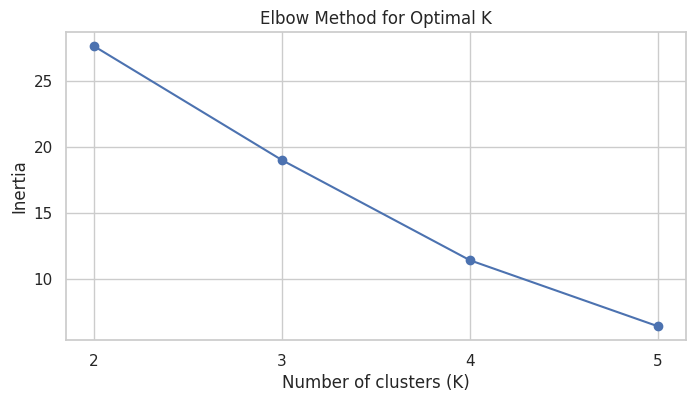

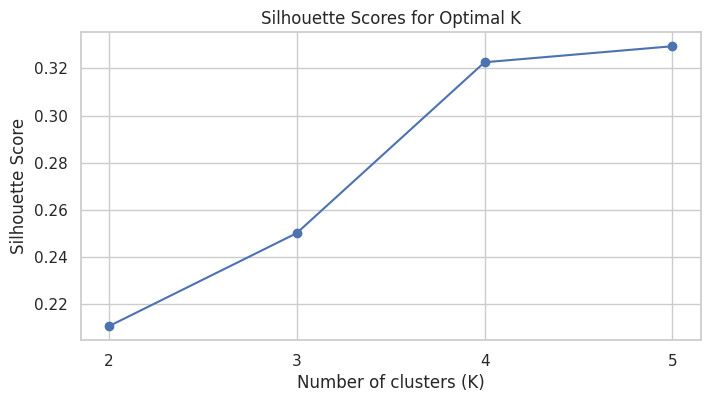

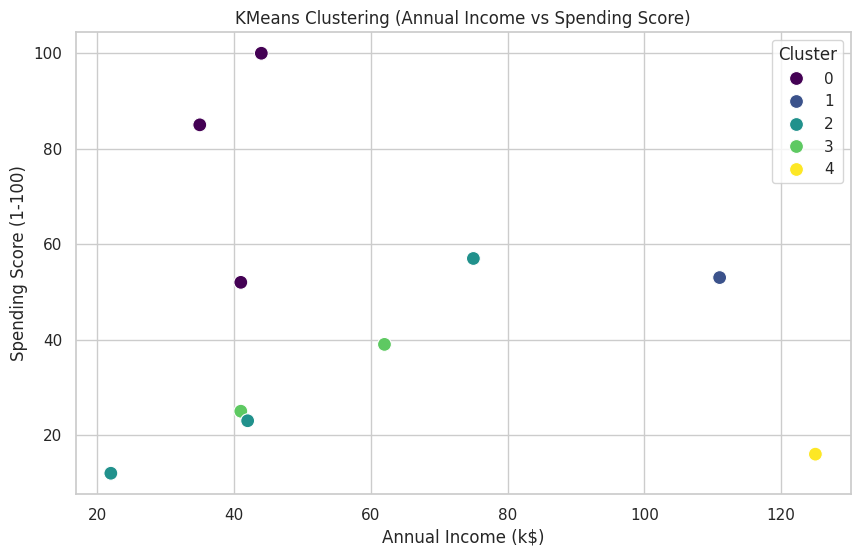

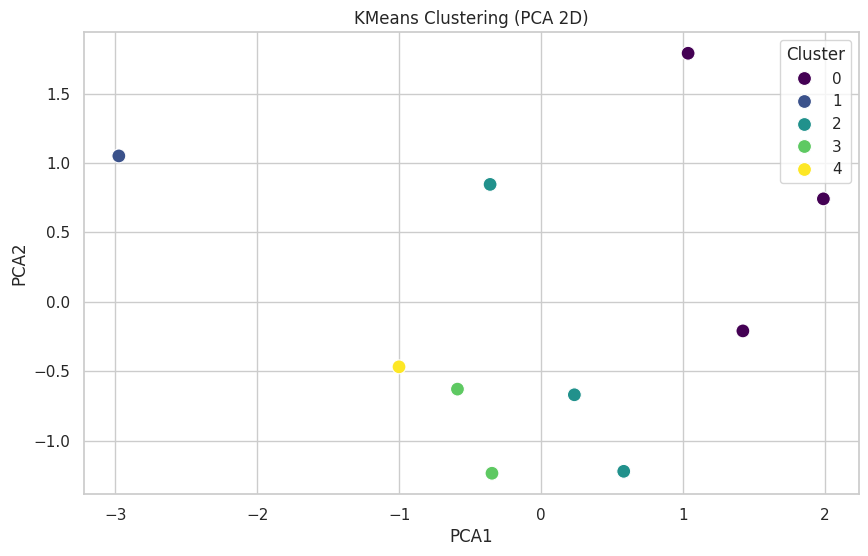

In [10]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

# Create the output directory if it doesn't exist
output_dir = 'customer_segmentation_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Plot Inertia (Elbow Method)
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'elbow.png'))
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, sil_scores, marker='o')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'silhouette.png'))
plt.show()

# Plot Income vs Spending with KMeans clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_cluster', data=df, palette='viridis', s=100)
plt.title('KMeans Clustering (Annual Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.savefig(os.path.join(output_dir, 'income_spending_clusters.png'))
plt.show()

# Plot PCA 2D with KMeans clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['KMeans_cluster'] = df['KMeans_cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_cluster', data=df_pca, palette='viridis', s=100)
plt.title('KMeans Clustering (PCA 2D)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.savefig(os.path.join(output_dir, 'pca_kmeans.png'))
plt.show()